<h1>CVD Risk Estimation with Tri2D-Net</h1>

Efficient, Easy-to-use & Private<sup>*</sup>

---

<a href="https://colab.research.google.com/github/DIAL-RPI/CVD-Risk-Estimator/blob/master/colab_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


With this notebook powered by Google Colab, you can conduct CVD risk esitmation on any chest low dose CT (LDCT) image by simple **3 steps**!
- Initialization (automatic)
- Upload data 
- Risk Estimation (automatic)

<sup><sub>* All results and data you uploaded or generated in this code would not be sent to anywhere or anyone. It is only temporary preserved in the virtual machine you are using and would be completely deleted along with the virtual machine when you leave a while.</sub></sup>



# **Step 1: Initialize Running Environment & Model**

This step is generally automatic. As the code will fetch the parameter of the model from our Google Drive, please follow the prompts to login with your Google account. The code will not fetch any of your data.

In [1]:
import os
if not os.path.isdir('/content/CVD-Risk-Estimator'):
  !git clone -b develop https://github.com/DIAL-RPI/CVD-Risk-Estimator.git
import sys
sys.path.append('/content/CVD-Risk-Estimator')
!pip install SimpleITK
import SimpleITK as sitk
sitk.ProcessObject.SetGlobalDefaultThreader("platform")
from colab_support import Image, load_model
from init_model import init_model
m = load_model(init_model())

Cloning into 'CVD-Risk-Estimator'...
remote: Enumerating objects: 245, done.
remote: Counting objects: 100% (245/245), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 245 (delta 143), reused 173 (delta 74), pack-reused 0
Receiving objects: 100% (245/245), 7.67 MiB | 23.58 MiB/s, done.
Resolving deltas: 100% (143/143), done.
     |████████████████████████████████| 47.4MB 67kB/s 
Initializing model...
Please login to download the model parameters.
Loading model parameters...
Model initialized.


# **Step 2: Load & Preprocess Data**

#### **Step 2.1: Load a CT Image**

We provide 3 ways to load a CT Image. Chose one to load a CT image.

**1. Load one of our demo**

We provide 8 demos from the National Lung Cancer Screening Trial (NLST) with different radiologists readed risk<sup>1</sup> and deep learning estimated risk<sup>2</sup>:

| ID | Age | Gender | Reader| Tri2D-Net| Endpoint<sup>*</sup> | Days from Exam to Endpoint |
| :--- | :----: | :----: | :----: | :----: | :----: | :----: |
| 1 | 55| F | 0 | 0.008 | Active | 2758 |
| 2 | 74| F | 0.67| 0.391 | Deceased | 789 |
| 3 | 69| M | 1 | 0.098 | Active | 2732 |
| 4 | 65| M | 1 | 0.258 | Active | 2710 |
| 5 | 65| M | 2 | 0.385 | Active | 2357 |
| 6 | 69| F | 2 | 0.181 | Active | 1171 |
| 7 | 66| M | 3 | 0.412 | Active | 2591 |
| 8 | 59| F | 3 | 0.897 | Deceased | 493 |

<sup><sub>* 'Active' means the patient is still alive when the trial ends.</sub></sup>

**2. Upload a chest LDCT image from your computer**

You can upload a chest LDCT image with any size and resolustion from your computer. The file should be a NIfTI file.


**3. Upload a pre-cropped heart region from your computer**

In few cases, the provided heart detector might fail in detect heart. In that case, you can manually crop the heart region of your image and upload the cropped image for CVD risk estimation. The cropped image should be saved as a NIfTI file.

<sup><sub>1. Three radiologists graded the cases into 4 levels  based on coronary artery calcification (level 0 - normal, level 1 - minimal, level 2 - moderate, level 3 - heavy). Numbers shown in the upper table are grades averaged on all three readings. For more details please refer to [our paper](https://arxiv.org/abs/2008.06997).</sub></sup>

<sup><sub>2. Our Tri2D-Net calculates a risk score range 0-1. A larger risk score indicates higher CVD risks. For more details please refer to [our paper](https://arxiv.org/abs/2008.06997).</sub></sup>

**Option 1: Load a Demo**

Details on running this cell:
- Run the cell below
- Type in the ID of the demo (1-8) you want to try (press `Enter` to confirm your input)

In [2]:
img = Image()
id = input('ID of the demo you want to try:')
img.load_demo(id)

ID of the demo you want to try:8


**Option 2: Upload a Chest LDCT from Your Computer**

Details on running this cell:
- Run the cell below
- Follow the promots to upload a NIfTI file from your computer

In [ ]:
img = Image()
img.upload_nifti()

**Option 3: Upload a Pre-cropped Heart Region from Your Computer**

Details on running this cell:
- Run the cell below
- Follow the promots to upload a NIfTI file from your computer

In [ ]:
img = Image()
img.upload_heart_region_nifti()

#### **Step 2.2: Detect Heart**

If you uploaded a cropped heart region in Step 2.1, you do not need to run this step.

This step is fully automatic. 

<sup><sub>**NOTE:** If you uploaded a chest LDCT in Step 2.1 and either side of its axial plane is smaller than 480 pixel or larger than 550 pixel, the image will be resized before heart detection. The resizing step might take few minutes to complete.</sup></sub>

In [3]:
img.detect_heart()

Loading the heart detector...
Detecting heart...


#### **Step 2.3 (Optional): Visualize Heart Detection Results**

If you successfully ran Step 2.2, you can visualize the detection results in this cell.

<sup><sub>**NOTE:** This step is not required for CVD risk estimation.</sup></sub>

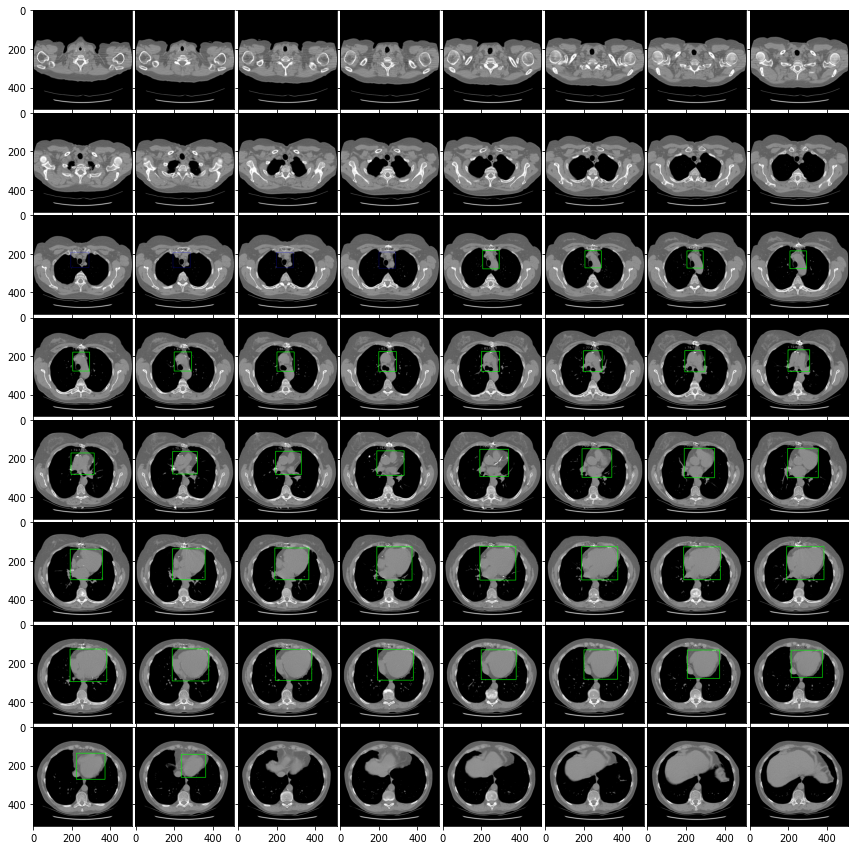

In [4]:
img.detect_visual()

# **Step 3: Calculate CVD Risk Score**

#### **Step 3.1: Calculate CVD Risk Score**

This step is fully automatic. Just run the cell below and the Tri2D-Net will calculate a CVD risk score.

In [5]:
score = m.aug_transform(img.to_network_input())[1]
print('Estimated CVD risk score:', '%.5f' % score)

Estimated CVD risk score: 0.89686


#### **Step 3.2 (Optional): Visualize the Tri2D-Net's Heatmap**

The heatmap indicates regions with positive contribution in the CVD risk score estimated by the Tri2D-Net. From blue to red, red represents high contirbution and blue means low or no contribution. 

<sup><sub>**NOTE:** This step is not required for CVD risk estimation.</sup></sub>

In [6]:
m.grad_cam_visual(img.to_network_input())

Output hidden; open in https://colab.research.google.com to view.